In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [3]:
accidents_df = pd.read_csv('explored_accidents.csv')
weather_df = pd.read_csv('explored_weather.csv')

In [28]:
final_df = pd.merge(accidents_df, weather_df, left_on='month', right_on='Month', how='left')
df = final_df.drop(columns=['Month'])
df.to_csv('combined_accidents_weather_data.csv', index=False)
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['month'] = pd.Categorical(df['month'], categories=months_order, ordered=True)
df.columns

Index(['id', 'district', 'street', 'month', 'hour', 'weekday', 'category',
       'kind', 'type', 'lighting conditions', 'bicycle', 'car', 'pedestrian',
       'motorbike', 'truck', 'other vehicle', 'road condition', 'LINREFX',
       'LINREFY', 'Precision', 'AirPressure', 'SunshineDuration'],
      dtype='object')

In [5]:
df

,id,district,street,month,hour,weekday,category,kind,type,lighting conditions,...,pedestrian,motorbike,truck,other vehicle,road condition,LINREFX,LINREFY,Precision,AirPressure,SunshineDuration
0,49090,Reinickendorf,Wittenau Süd,Jan,13,Friday,light casualty,crash with turning/crossing vehicle,crossing,daylight,...,0,0,0,0,wet,794062.2837,5835083.823,54.1,1.18,47.0
1,49091,Pankow,Pankow Süd,Jan,9,Thursday,light casualty,crash with turning/crossing vehicle,crossing,daylight,...,0,0,0,0,dry,799130.4007,5832327.415,54.1,1.18,47.0
2,49093,Reinickendorf,Breitkopfbecken,Mar,21,Friday,light casualty,other accident,going straight,darkness,...,0,0,0,0,dry,795437.6130,5833549.454,55.2,6.84,88.1
3,49096,Steglitz-Zehlendorf,Nikolassee,Jan,7,Friday,serious injury,crash between vehicle and pedestrian,exceeding limit,dawn,...,1,0,0,0,wet,786714.3754,5817042.137,54.1,1.18,47.0
4,49097,Tempelhof-Schöneberg,Grazer Platz,Feb,15,Tuesday,light casualty,crash with vehicle ahead,lengthwise traffic,daylight,...,0,0,0,0,dry,796074.3342,5822724.905,23.9,4.25,119.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13384,202775,Mitte,Alexanderplatzviertel,Dec,15,Monday,light casualty,lateral crash with vehicle driving in same dir...,lengthwise traffic,daylight,...,1,0,0,0,dry,799498.0190,5828344.449,31.6,4.10,53.9
13385,202776,Mitte,Wilhelmstraße,Dec,14,Monday,light casualty,crash with parked vehicle,stationary traffic,daylight,...,0,0,0,0,dry,797455.1835,5827060.276,31.6,4.10,53.9
13386,202777,Mitte,Karl-Marx-Allee,Dec,14,Monday,light casualty,crash with vehicle ahead,turning,daylight,...,0,0,0,1,dry,799730.8820,5827547.138,31.6,4.10,53.9
13387,202778,Lichtenberg,Rüdigerstraße,Dec,18,Wednesday,serious injury,crash with turning/crossing vehicle,turning,darkness,...,0,1,0,0,dry,805189.9710,5827912.648,31.6,4.10,53.9


# Start Ploting:

In [6]:
df['car'].sum()

10907

In [7]:
df['car'].nunique()

2

In [8]:
car_sum_jan = df[df['month'] == 'Jun']['car'].sum()
print(f"Total Car Count for January: {car_sum_jan}")

Total Car Count for January: 1132


In [9]:
car_sum_jan = df[df['month'] == 'Aug']['bicycle'].sum()
print(f"Total Car Count for January: {car_sum_jan}")

Total Car Count for January: 650


In [10]:
car_sum_jan = df[df['month'] == 'Jun']['truck'].sum()
print(f"Total Car Count for January: {car_sum_jan}")

Total Car Count for January: 60


In [11]:
car_sum_jan = df[df['month'] == 'Dec']['motorbike'].sum()
print(f"Total Car Count for January: {car_sum_jan}")

Total Car Count for January: 83


In [12]:
car_sum_jan = df[df['month'] == 'Dec']['pedestrian'].sum()
print(f"Total Car Count for January: {car_sum_jan}")

Total Car Count for January: 193


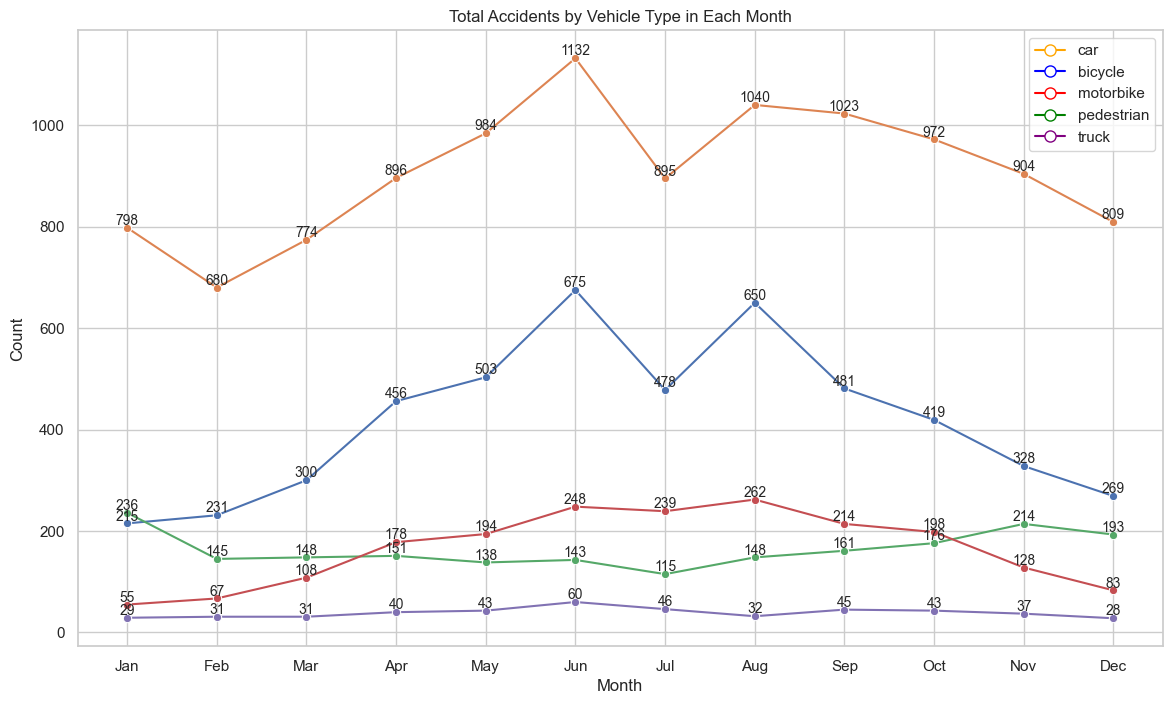

In [37]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# Set Seaborn style and grid
sns.set(style='whitegrid')

# Assuming accidents_df is your DataFrame
plt.figure(figsize=(14, 8))

# Convert 'month' to categorical with a custom order
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
accidents_df['month'] = pd.Categorical(accidents_df['month'], categories=months_order, ordered=True)

# Group by month and calculate the sum of selected columns
columns_to_sum = ['bicycle', 'car', 'pedestrian', 'motorbike', 'truck']
counts_by_month = accidents_df.groupby('month', observed=False)[columns_to_sum].sum()

# Plot the total counts for each month with straight lines
sns.lineplot(data=counts_by_month, marker='o', dashes=False)

# Annotate each point with its value
for column in columns_to_sum:
    for i, value in enumerate(counts_by_month[column]):
        plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.title('Total Accidents by Vehicle Type in Each Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Create custom legend markers with different colors for each vehicle type
legend_markers = [
    Line2D([0], [0], marker='o', color='orange', label='car', markerfacecolor='w', markersize=8),
    Line2D([0], [0], marker='o', color='blue', label='bicycle', markerfacecolor='w', markersize=8),
    Line2D([0], [0], marker='o', color='red', label='motorbike', markerfacecolor='w', markersize=8),
    Line2D([0], [0], marker='o', color='green', label='pedestrian', markerfacecolor='w', markersize=8),
    Line2D([0], [0], marker='o', color='purple', label='truck', markerfacecolor='w', markersize=8),
]

# Set custom legend markers
plt.legend(handles=legend_markers)
plt.show()

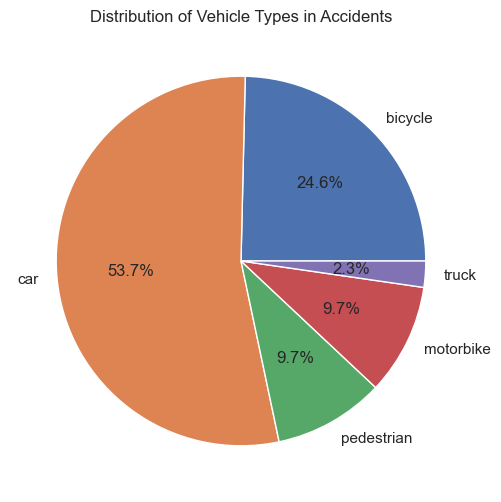

In [45]:
# List of vehicle types
vehicles = ['bicycle', 'car', 'pedestrian', 'motorbike', 'truck']

# Calculate the sum for each vehicle type
vehicle_counts = [df[vehicle].sum() for vehicle in vehicles]

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(vehicle_counts, labels=vehicles, autopct='%1.1f%%')
plt.title('Distribution of Vehicle Types in Accidents')
plt.show()

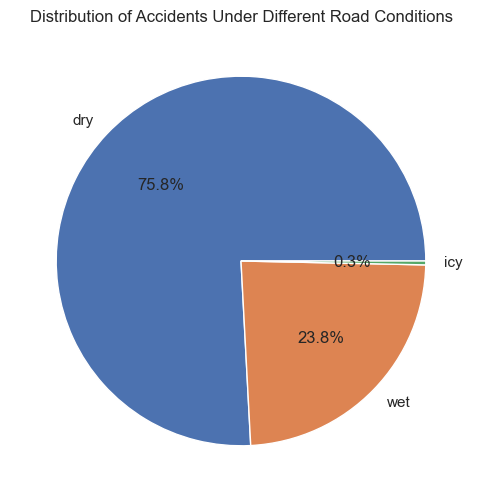

In [46]:
# List of road conditions
conditions = ['dry', 'wet', 'icy']

# Filter the DataFrame for the specified road conditions
df = df[df['road condition'].isin(conditions)]

# Calculate the count for each road condition
condition_counts = df['road condition'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Accidents Under Different Road Conditions')
plt.show()


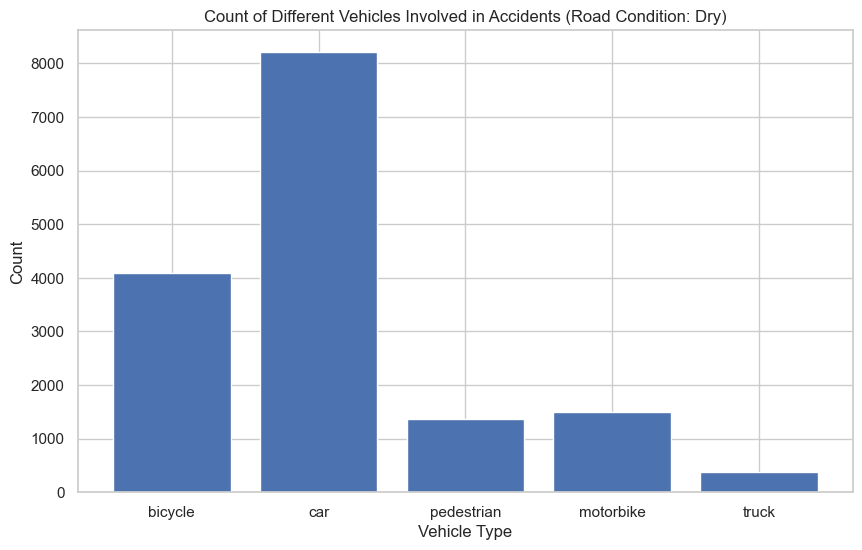

In [48]:
# List of vehicle types
vehicles = ['bicycle', 'car', 'pedestrian', 'motorbike', 'truck']

# Filter the DataFrame for the specified road condition
df_dry = df[df['road condition'] == 'dry']

# Calculate the sum for each vehicle type
vehicle_counts = [df_dry[vehicle].sum() for vehicle in vehicles]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(vehicles, vehicle_counts)
plt.title('Count of Different Vehicles Involved in Accidents (Road Condition: Dry)')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

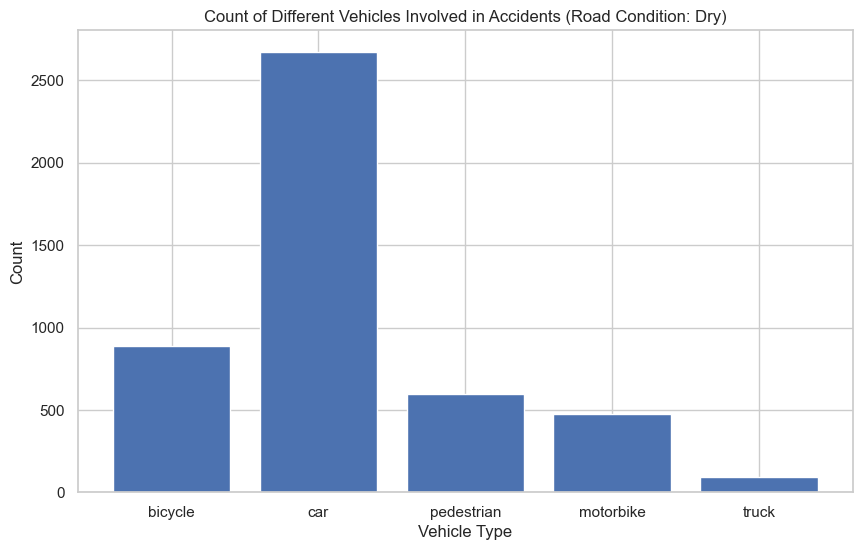

In [51]:
# List of vehicle types
vehicles = ['bicycle', 'car', 'pedestrian', 'motorbike', 'truck']

# Filter the DataFrame for the specified road condition
df_dry = df[df['road condition'] == 'wet']

# Calculate the sum for each vehicle type
vehicle_counts = [df_dry[vehicle].sum() for vehicle in vehicles]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(vehicles, vehicle_counts)
plt.title('Count of Different Vehicles Involved in Accidents (Road Condition: Dry)')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()


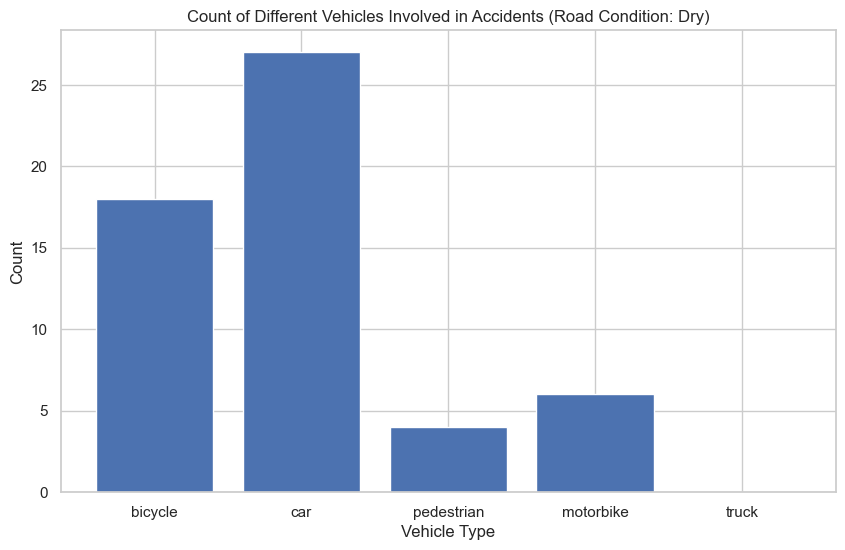

In [52]:
# List of vehicle types
vehicles = ['bicycle', 'car', 'pedestrian', 'motorbike', 'truck']

# Filter the DataFrame for the specified road condition
df_dry = df[df['road condition'] == 'icy']

# Calculate the sum for each vehicle type
vehicle_counts = [df_dry[vehicle].sum() for vehicle in vehicles]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(vehicles, vehicle_counts)
plt.title('Count of Different Vehicles Involved in Accidents (Road Condition: Dry)')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()


In [34]:
df['Precision']

0        54.1
1        54.1
2        55.2
3        54.1
4        23.9
         ... 
13384    31.6
13385    31.6
13386    31.6
13387    31.6
13388    31.6
Name: Precision, Length: 13389, dtype: float64

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='road condition', data=final_df)
plt.title('Vehicle Types by Weather Condition')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='category', hue='road condition', data=final_df, palette='viridis', dodge=True)
plt.title('Vehicle Types by Weather and Lighting Conditions')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = final_df[['AirPressure', 'SunshineDuration', 'bicycle', 'car', 'pedestrian', 'motorbike', 'truck', 'other vehicle']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Weather Variables and Vehicle Types')
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='month', y='car', hue='road condition', data=final_df)
plt.title('Monthly Trends of Cars Under Different Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='road condition', y='car', data=final_df, palette='Set3')
plt.title('Distribution of Cars Across Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Creating a simple example graph
G = nx.Graph()
G.add_nodes_from(final_df['district'])
G.add_nodes_from(final_df['category'])
G.add_nodes_from(final_df['road condition'])

# Adding edges based on some criteria, you may adjust this based on your actual data
for _, row in final_df.iterrows():
    G.add_edge(row['district'], row['category'])
    G.add_edge(row['category'], row['road condition'])

# Generating the network graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1000, edge_color='gray')

plt.title('Network Graph: Relationships Between Districts, Vehicle Types, and Weather Conditions')
plt.show()


In [ ]:
import networkx as nx

# Assuming G is your network graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1000, edge_color='gray')
plt.title('Network Graph: Relationships Between Districts, Vehicle Types, and Weather Conditions')
plt.show()